In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [93]:
def speedup_plot(df, out_fn):
    eserial = min(df[df['name'] == 'earley_serial']['avg_time'])
    lserial = min(df[df['name'] == 'late_serial']['avg_time'])
    par_x = df[df['name'] == 'late_parallel']['threads'] 
    par_y = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()

    fig, ax1 = plt.subplots()
    ax1.set_title('Speedup Over Serial')

    ax1.set_xlabel('# of threads')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('# of cores', (10.4, 0.2), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(par_x, lserial / par_y)
    ax1.set_ylabel('Speedup over serial Late algorithm')

    ax2 = ax1.twinx()
    ax2.plot(par_x, eserial / par_y, linestyle='None')
    ax2.set_ylabel('Speedup over serial Earley algorithm')
    
    fig.canvas.draw()
    ax1.set_yticklabels([l.get_text()+'x' for l in ax1.get_yticklabels()])
    ax2.set_yticklabels([l.get_text()+'x' for l in ax2.get_yticklabels()])

    plt.savefig(out_fn, dpi=300)
    plt.show()

In [89]:
dfs = []
for fn in glob('results/arith_per_item/*csv'):
    ambig = int(fn.split('-')[1].split('.')[0])
    df = pd.read_csv(fn)
    df['ambig'] = pd.Series([ambig]*len(df))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df = df.set_index('ambig')
df = df.sort_index()
df

,name,avg_time,tot_time,repeats,threads,chart_size
ambig,,,,,,
1,late_parallel,0.031087,1.02977,28,20,30108
2,late_parallel,0.033636,1.02781,26,20,66499
3,late_parallel,0.044953,1.01532,20,20,145564
4,late_parallel,0.035705,1.06306,18,20,316260
5,late_parallel,0.147868,1.00170,6,20,682784
6,late_parallel,0.233131,1.03802,3,20,1466096
7,late_parallel,0.605296,1.53562,2,20,3133248
8,late_parallel,2.194630,2.19463,1,20,6668608
9,late_parallel,4.135860,4.13586,1,20,14141440


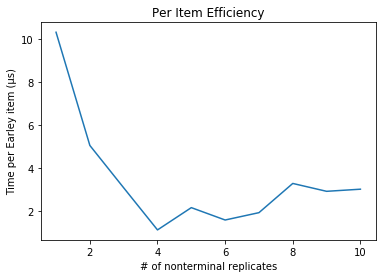

In [91]:
x = range(1, len(df)+1)
y = (df['avg_time'] / df['chart_size'] * 10 * 1000000).as_matrix()

fig, ax = plt.subplots()
ax.set_title('Per Item Efficiency')
ax.set_ylabel('Time per Earley item (μs)')
ax.set_xlabel('# of nonterminal replicates')
plt.plot(x, y)
plt.savefig('../earley_paper/figures/per_item_time.png', dpi=300)
plt.show()

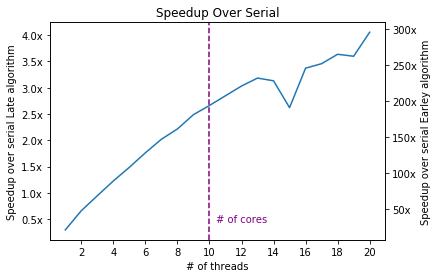

In [96]:
cgw_df = pd.read_csv('results/arith-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/arith_scaling.png')

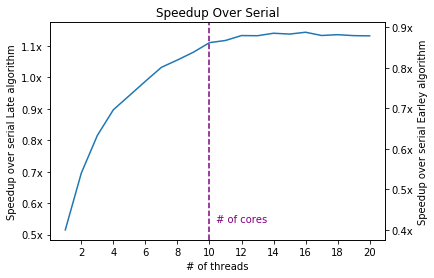

In [94]:
java_df = pd.read_csv('results/java-strong-scaling.csv')
speedup_plot(java_df, '../earley_paper/figures/java_scaling.png')

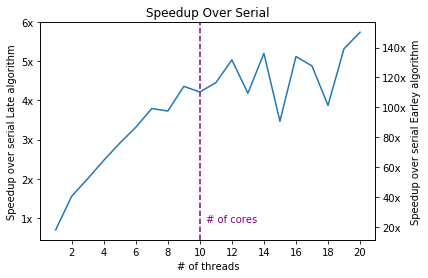

In [95]:
cgw_df = pd.read_csv('results/cgw-strong-scaling.csv')
speedup_plot(cgw_df, '../earley_paper/figures/cgw_scaling.png')

In [50]:
arith_weak_df = pd.read_csv('results/arith-weak-scaling.csv')
java_weak_df = pd.read_csv('results/java-weak-scaling.csv')
cgw_weak_df = pd.read_csv('results/cgw-weak-scaling.csv')

In [85]:
def weak_scaling_plot(df, out_fn):
    lserial = min(df[df['name'] == 'late_serial']['avg_time'])
    num_threads = df[df['name'] == 'late_parallel']['threads'].as_matrix()
    avg_time = df[df['name'] == 'late_parallel']['avg_time'].as_matrix()
        
    fig, ax1 = plt.subplots()
    ax1.set_title('Weak Scaling Efficiency')

    ax1.set_ylabel('Efficiency (% of linear)')
    ax1.set_xlabel('# of threads')
    ax1.set_xticks(np.arange(2, 22, 2))

    ax1.axvline(10, linestyle='dashed', color='purple')
    ax1.annotate('# of cores', (10.4, 0.8), xycoords=('data', 'figure fraction'), color='purple')

    ax1.plot(num_threads, lserial / avg_time * 100)
    
    fig.canvas.draw()

    plt.savefig(out_fn, dpi=300)
    plt.show()

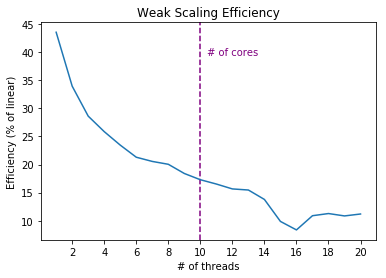

In [86]:
weak_scaling_plot(arith_weak_df, '../earley_paper/figures/arith-weak-scaling.png')

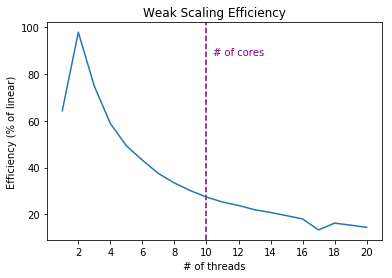

In [87]:
weak_scaling_plot(java_weak_df, '../earley_paper/figures/java-weak-scaling.png')

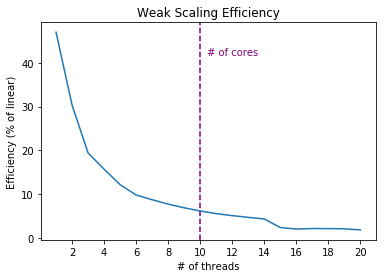

In [88]:
weak_scaling_plot(cgw_weak_df, '../earley_paper/figures/cgw-weak-scaling.png')

In [28]:
arith_weak_df['chart_size'] / 559

0      1.000000
1      1.000000
2      1.000000
3      1.921288
4      2.896243
5      3.844365
6      4.792487
7      5.819320
8      6.651163
9      7.708408
10     8.688730
11     9.627907
12    10.550984
13    11.534884
14    12.313059
15    13.334526
16    14.391771
17    15.332737
18    16.296959
19    17.234347
20    18.293381
21    19.182469
Name: chart_size, dtype: float64